In [24]:
import pandas as pd
import numpy as np
from urllib.request import urlopen #url의 html 을 가져 오기 위한 패키지
from bs4 import BeautifulSoup  #크롤링 필수 패키지 설치하려면 cmd창에서 pip install bs4
import os
import re
from selenium import webdriver
from bs4 import BeautifulSoup #크롤링 도구
from selenium.webdriver.common.keys import Keys
import time
from tqdm import tqdm
import os
import re
import time
import json
import datetime
from konlpy.tag import Okt
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
import matplotlib.pyplot as pp
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pylab as pl
import statsmodels.api as sm
from sklearn.cluster import DBSCAN
import sklearn as skl
import sklearn.model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import random
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import string
import glob
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim
import warnings

In [8]:
embedding_model = KeyedVectors.load_word2vec_format('C:/Users/USER/Desktop/백업/covid_model38_2') # 모델 로드
data50 = pd.read_excel('C:/Users/USER/Desktop/1~8newsurl/covid_url38_word50_2.xlsx', index_col=0)
data50[0:5]

,date,title,text,category,url,words,length_word,score
0,2020-03-01,코로나19에 3·1절 기념식 대폭 축소,코로나19 확산으로 오늘 열리는 101주년 삼일절 기념식이 최소 인원으로 치러집니다...,사회,https://news.naver.com/main/read.nhn?mode=LSD&...,"['코로나', '확산', '오늘', '주년', '삼일절', '기념', '식이', '...",54,-0.214365
1,2020-03-01,"삼척시, 감염병 예방과 정부사업 선점 투 트랙 대응",정부 공모사업 지난해보다 20% ↑ 1641억 발굴 [홍춘봉 기자(=삼척)] 삼척시...,사회,https://news.naver.com/main/read.nhn?mode=LSD&...,"['정부', '공모', '사업', '지난해', '발굴', '홍춘', '삼척', '삼...",114,0.869354
3,2020-03-01,신천지 이만희 도대체 어디있나…코로나 확산 책임 '대국민사과' 할까,대구 지역 코로나19 확진자 급증…신천지 연관신천지 교주 이만희 어디있나 두문불출박...,사회,https://news.naver.com/main/read.nhn?mode=LSD&...,"['대구', '지역', '코로나', '확진자', '급증', '신천지', '연관', ...",710,-0.459585
4,2020-03-01,[경제전망]6.2兆 이상 코로나19 추경안 나온다…물가 변화도 주목,[이미지출처=연합뉴스][아시아경제 김현정 기자] 신종 코로나바이러스감염증(코로나19...,경제,https://news.naver.com/main/read.nhn?mode=LSD&...,"['아시아', '경제', '김현정', '신종', '코로나바이러스', '감염증', '...",166,0.508688
5,2020-03-01,코로나19에도 2월 수출 4.5% 반등…대중 수출 부진 등 악재 가시화,[CBS노컷뉴스 김선경 기자]수출이 코로나19 악재에도 불구하고 15개월 만에 증가...,경제,https://news.naver.com/main/read.nhn?mode=LSD&...,"['김선경', '수출', '코로나', '악재', '불구', '개월', '증가', '...",241,0.255636


In [9]:
print(embedding_model.most_similar(positive=["특수고용직"], topn=100)) #관련단어 검색

[('특고', 0.7658202648162842), ('프리랜서', 0.7605330944061279), ('예술인', 0.5803738832473755), ('노동자', 0.5230354070663452), ('고용보험', 0.5103898048400879), ('비정규직', 0.4711024761199951), ('직종', 0.46784844994544983), ('택배기사', 0.45904144644737244), ('일용직', 0.4391153156757355), ('근로자', 0.43625542521476746), ('특수', 0.43624016642570496), ('생계비', 0.4286469519138336), ('근로', 0.4033961892127991), ('실직자', 0.393027126789093), ('생계', 0.38164326548576355), ('강사', 0.3726547956466675), ('방과후', 0.3674692213535309), ('영세', 0.3624613881111145), ('사자', 0.36005720496177673), ('업자', 0.35901951789855957), ('택시', 0.3513096272945404), ('가입자', 0.34810519218444824), ('자영', 0.34792646765708923), ('직업', 0.3437039852142334), ('사업자', 0.3421957492828369), ('원어민', 0.33970195055007935), ('대리', 0.3374965488910675), ('종사', 0.33585333824157715), ('교사', 0.32553547620773315), ('하위', 0.32452523708343506), ('소득', 0.3225969970226288), ('업주', 0.32185959815979004), ('발달장애', 0.3217431306838989), ('창작', 0.3144720494747162), ('실업자', 0.3142

In [17]:
aa = data50['words']
words = [i.replace("'","").replace('[','').replace(']','').replace(' ','').split(',') for i in aa]
print(type(words))
print(words[0])

<class 'list'>
['코로나', '확산', '오늘', '주년', '삼일절', '기념', '식이', '최소', '인원', '기념', '총리', '제외', '요인', '행정안전부', '보건복지부', '장관', '제외', '국무위원', '정당', '대표', '광복회', '참석', '행정안전부', '코로나', '사태', '참석', '인원', '최소', '참석자', '발열', '검사', '증상', '문진', '행사', '시작', '전후', '방역', '소독', '시행', '설명', '기념', '이상', '참석', '대규모', '행사', '주년', '었던', '지난해', '참석', '임명', '저작권', '복제', '재배', '금지']


In [18]:
word_list = ['특수고용직']
def word2vec_kkh2(word_list):
    xx_n = word_list
    avg_dist = []
    dist = []
    dist_dist = []
    for i in tqdm(range(len(words))):
        for k in words[i]:
            try:
                for m in xx_n:
                    # 비교하여 similarity 구하기
                    dist_dist.append(embedding_model.similarity(m, k))
            except:
                dist_dist.append(0)
            dist2 = np.array(dist_dist)
            dist.append(sum(dist2))
            dist_dist = []
        if len(dist) > 1000:
            dist = sorted(dist, reverse=True)[:1000]
        avg_dist.append(np.mean(dist))
        dist = []
    return avg_dist
data50['score_special_job'] = word2vec_kkh2(word_list)

100%|███████████████████████████████████████████████████████████████████████████| 63561/63561 [03:35<00:00, 295.62it/s]


In [22]:
data50 = data50.sort_values('score_special_job', ascending=False)
data50['rank'] = [i+1 for i in range(len(data50))]
#data50['y'] = [1 if i <= 2000 else 0 for i in data50['rank']]
data50 = data50[0:500]

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


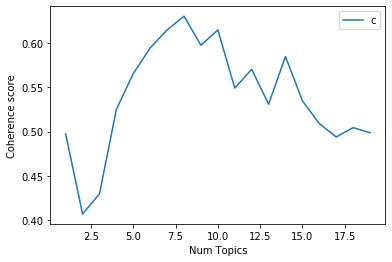

In [27]:
aa = data50['words']
news = [i.replace("'","").replace('[','').replace(']','').replace(' ','').split(',') for i in aa]

id2word = corpora.Dictionary(news)

texts = news

corpus = [id2word.doc2bow(text) for text in texts]

#토픽모델링 함수
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
      print(num_topics)
      model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              num_topics=num_topics,
                                              random_state=100,
                                              update_every=1,
                                              chunksize=100,
                                              passes=10,
                                              alpha='auto',
                                              per_word_topics=True)
      model_list.append(model)
      coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
      coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values


model_list3, coherence_values3 = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=1, limit=20, step=1)

# Show graph
limit=20; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values3)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [30]:
# Print the coherence scores
for m, cv in zip(x, coherence_values3):
  print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.4973
Num Topics = 2  has Coherence Value of 0.4068
Num Topics = 3  has Coherence Value of 0.4294
Num Topics = 4  has Coherence Value of 0.5251
Num Topics = 5  has Coherence Value of 0.5656
Num Topics = 6  has Coherence Value of 0.5946
Num Topics = 7  has Coherence Value of 0.615
Num Topics = 8  has Coherence Value of 0.6305
Num Topics = 9  has Coherence Value of 0.5977
Num Topics = 10  has Coherence Value of 0.615
Num Topics = 11  has Coherence Value of 0.5492
Num Topics = 12  has Coherence Value of 0.5705
Num Topics = 13  has Coherence Value of 0.531
Num Topics = 14  has Coherence Value of 0.585
Num Topics = 15  has Coherence Value of 0.5348
Num Topics = 16  has Coherence Value of 0.509
Num Topics = 17  has Coherence Value of 0.4938
Num Topics = 18  has Coherence Value of 0.5044
Num Topics = 19  has Coherence Value of 0.4987


In [32]:
# Select the model and print the topics
optimal_model = model_list3[7]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=15))

[(0,
  '0.022*"언론" + 0.015*"기사" + 0.014*"최욱" + 0.012*"이상호" + 0.012*"중앙" + '
  '0.011*"보도" + 0.009*"단체" + 0.008*"하승수" + 0.008*"표현" + 0.007*"임자" + '
  '0.007*"일감" + 0.007*"언론사" + 0.006*"시민단체" + 0.006*"한승연" + 0.005*"회계"'),
 (1,
  '0.046*"가구" + 0.042*"소득" + 0.036*"만원" + 0.032*"지급" + 0.030*"지원" + 0.017*"재난" '
  '+ 0.015*"긴급" + 0.014*"정부" + 0.014*"생활" + 0.012*"코로나" + 0.011*"수급" + '
  '0.010*"중위" + 0.009*"기준" + 0.009*"서울시" + 0.008*"급여"'),
 (2,
  '0.033*"고용보험" + 0.018*"노동자" + 0.016*"국민" + 0.014*"택배" + 0.012*"예술인" + '
  '0.011*"최저임금" + 0.011*"정부" + 0.009*"노동" + 0.009*"가입" + 0.009*"적용" + '
  '0.009*"업자" + 0.008*"확대" + 0.008*"자영" + 0.008*"소득" + 0.008*"국회"'),
 (3,
  '0.039*"고용" + 0.027*"지원" + 0.020*"사업" + 0.018*"코로나" + 0.018*"휴직" + '
  '0.013*"유지" + 0.012*"무급" + 0.012*"신청" + 0.011*"지급" + 0.011*"근로자" + '
  '0.011*"원금" + 0.010*"정부" + 0.009*"업종" + 0.009*"감소" + 0.008*"휴업"'),
 (4,
  '0.024*"지원" + 0.021*"수업" + 0.014*"코로나" + 0.014*"학생" + 0.011*"노동자" + '
  '0.011*"장애인" + 0.010*"온라인" + 0.010*"학교" + 0.010*"

In [43]:

print(embedding_model.most_similar(positive=["택배기사"], topn=100)) #관련단어 검색

[('택배', 0.6437177062034607), ('노동자', 0.4971367418766022), ('라이더', 0.4752718210220337), ('택시', 0.4706776738166809), ('특수고용직', 0.45904144644737244), ('기사', 0.4540750980377197), ('일해', 0.432320773601532), ('대리', 0.41549211740493774), ('프리랜서', 0.39682406187057495), ('사자', 0.39595329761505127), ('요양보호사', 0.39400213956832886), ('근로자', 0.3887852728366852), ('종사', 0.38770943880081177), ('특고', 0.37564125657081604), ('쿠팡', 0.3723386526107788), ('퇴근', 0.3701125979423523), ('배송', 0.3567667007446289), ('간호사', 0.3443457782268524), ('처우', 0.3424288332462311), ('직종', 0.3419587314128876), ('아르바이트', 0.34152406454086304), ('산재', 0.3354710638523102), ('근로', 0.3305916488170624), ('작업장', 0.33016273379325867), ('차고', 0.3276817798614502), ('생계비', 0.3243418335914612), ('종일', 0.3240853548049927), ('근무', 0.3231182098388672), ('우체국', 0.3230486512184143), ('운전', 0.3228621780872345), ('간병인', 0.32271629571914673), ('노동', 0.32162049412727356), ('눈치', 0.317280650138855), ('내주', 0.3113408088684082), ('수령', 0.3102431595

In [38]:
data50 = pd.read_excel('C:/Users/USER/Desktop/1~8newsurl/covid_url38_word50_2.xlsx', index_col=0)

aa = data50['words']
words = [i.replace("'","").replace('[','').replace(']','').replace(' ','').split(',') for i in aa]
print(type(words))
print(words[0])

word_list = ['의료진']
def word2vec_kkh2(word_list):
    xx_n = word_list
    avg_dist = []
    dist = []
    dist_dist = []
    for i in tqdm(range(len(words))):
        for k in words[i]:
            try:
                for m in xx_n:
                    # 비교하여 similarity 구하기
                    dist_dist.append(embedding_model.similarity(m, k))
            except:
                dist_dist.append(0)
            dist2 = np.array(dist_dist)
            dist.append(sum(dist2))
            dist_dist = []
        if len(dist) > 1000:
            dist = sorted(dist, reverse=True)[:1000]
        avg_dist.append(np.mean(dist))
        dist = []
    return avg_dist
data50['score_special_job'] = word2vec_kkh2(word_list)

  0%|                                                                              | 30/63561 [00:00<03:33, 297.82it/s]

<class 'list'>
['코로나', '확산', '오늘', '주년', '삼일절', '기념', '식이', '최소', '인원', '기념', '총리', '제외', '요인', '행정안전부', '보건복지부', '장관', '제외', '국무위원', '정당', '대표', '광복회', '참석', '행정안전부', '코로나', '사태', '참석', '인원', '최소', '참석자', '발열', '검사', '증상', '문진', '행사', '시작', '전후', '방역', '소독', '시행', '설명', '기념', '이상', '참석', '대규모', '행사', '주년', '었던', '지난해', '참석', '임명', '저작권', '복제', '재배', '금지']


100%|███████████████████████████████████████████████████████████████████████████| 63561/63561 [03:39<00:00, 290.10it/s]


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


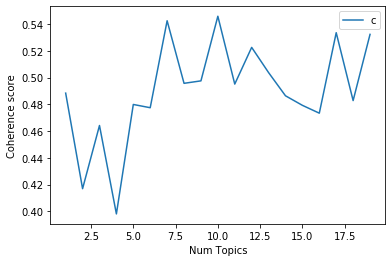

In [39]:

data50 = data50.sort_values('score_special_job', ascending=False)
data50['rank'] = [i+1 for i in range(len(data50))]
#data50['y'] = [1 if i <= 2000 else 0 for i in data50['rank']]
data50 = data50[0:500]

aa = data50['words']
news = [i.replace("'","").replace('[','').replace(']','').replace(' ','').split(',') for i in aa]

id2word = corpora.Dictionary(news)

texts = news

corpus = [id2word.doc2bow(text) for text in texts]

#토픽모델링 함수
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
      print(num_topics)
      model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              num_topics=num_topics,
                                              random_state=100,
                                              update_every=1,
                                              chunksize=100,
                                              passes=10,
                                              alpha='auto',
                                              per_word_topics=True)
      model_list.append(model)
      coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
      coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values


model_list3, coherence_values3 = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=1, limit=20, step=1)

# Show graph
limit=20; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values3)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [41]:
# Print the coherence scores
for m, cv in zip(x, coherence_values3):
  print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
# Select the model and print the topics
optimal_model = model_list3[6]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=15))

Num Topics = 1  has Coherence Value of 0.4883
Num Topics = 2  has Coherence Value of 0.417
Num Topics = 3  has Coherence Value of 0.4642
Num Topics = 4  has Coherence Value of 0.3981
Num Topics = 5  has Coherence Value of 0.4799
Num Topics = 6  has Coherence Value of 0.4774
Num Topics = 7  has Coherence Value of 0.5424
Num Topics = 8  has Coherence Value of 0.4957
Num Topics = 9  has Coherence Value of 0.4975
Num Topics = 10  has Coherence Value of 0.5458
Num Topics = 11  has Coherence Value of 0.4951
Num Topics = 12  has Coherence Value of 0.5225
Num Topics = 13  has Coherence Value of 0.5037
Num Topics = 14  has Coherence Value of 0.4863
Num Topics = 15  has Coherence Value of 0.4792
Num Topics = 16  has Coherence Value of 0.4734
Num Topics = 17  has Coherence Value of 0.5335
Num Topics = 18  has Coherence Value of 0.4828
Num Topics = 19  has Coherence Value of 0.5322
[(0,
  '0.015*"상황" + 0.012*"사람" + 0.011*"어요" + 0.009*"부분" + 0.009*"간호사" + '
  '0.009*"고요" + 0.009*"우리" + 0.008*"래서" +

  0%|                                                                              | 29/63561 [00:00<03:39, 289.88it/s]

<class 'list'>
['코로나', '확산', '오늘', '주년', '삼일절', '기념', '식이', '최소', '인원', '기념', '총리', '제외', '요인', '행정안전부', '보건복지부', '장관', '제외', '국무위원', '정당', '대표', '광복회', '참석', '행정안전부', '코로나', '사태', '참석', '인원', '최소', '참석자', '발열', '검사', '증상', '문진', '행사', '시작', '전후', '방역', '소독', '시행', '설명', '기념', '이상', '참석', '대규모', '행사', '주년', '었던', '지난해', '참석', '임명', '저작권', '복제', '재배', '금지']


100%|███████████████████████████████████████████████████████████████████████████| 63561/63561 [03:37<00:00, 292.36it/s]


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


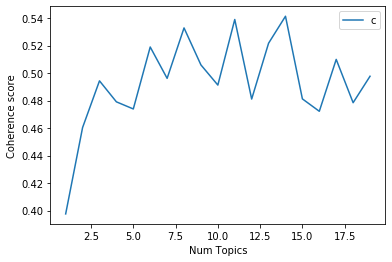

In [44]:
data50 = pd.read_excel('C:/Users/USER/Desktop/1~8newsurl/covid_url38_word50_2.xlsx', index_col=0)

aa = data50['words']
words = [i.replace("'","").replace('[','').replace(']','').replace(' ','').split(',') for i in aa]
print(type(words))
print(words[0])

word_list = ['택배기사']
def word2vec_kkh2(word_list):
    xx_n = word_list
    avg_dist = []
    dist = []
    dist_dist = []
    for i in tqdm(range(len(words))):
        for k in words[i]:
            try:
                for m in xx_n:
                    # 비교하여 similarity 구하기
                    dist_dist.append(embedding_model.similarity(m, k))
            except:
                dist_dist.append(0)
            dist2 = np.array(dist_dist)
            dist.append(sum(dist2))
            dist_dist = []
        if len(dist) > 1000:
            dist = sorted(dist, reverse=True)[:1000]
        avg_dist.append(np.mean(dist))
        dist = []
    return avg_dist
data50['score_special_job'] = word2vec_kkh2(word_list)



data50 = data50.sort_values('score_special_job', ascending=False)
data50['rank'] = [i+1 for i in range(len(data50))]
#data50['y'] = [1 if i <= 2000 else 0 for i in data50['rank']]
data50 = data50[0:500]

aa = data50['words']
news = [i.replace("'","").replace('[','').replace(']','').replace(' ','').split(',') for i in aa]

id2word = corpora.Dictionary(news)

texts = news

corpus = [id2word.doc2bow(text) for text in texts]

#토픽모델링 함수
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
      print(num_topics)
      model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                              id2word=id2word,
                                              num_topics=num_topics,
                                              random_state=100,
                                              update_every=1,
                                              chunksize=100,
                                              passes=10,
                                              alpha='auto',
                                              per_word_topics=True)
      model_list.append(model)
      coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
      coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values


model_list3, coherence_values3 = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=1, limit=20, step=1)

# Show graph
limit=20; start=1; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values3)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [47]:
# Print the coherence scores
for m, cv in zip(x, coherence_values3):
  print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
# Select the model and print the topics
optimal_model = model_list3[5]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=15))

Num Topics = 1  has Coherence Value of 0.3976
Num Topics = 2  has Coherence Value of 0.4604
Num Topics = 3  has Coherence Value of 0.4943
Num Topics = 4  has Coherence Value of 0.4791
Num Topics = 5  has Coherence Value of 0.4739
Num Topics = 6  has Coherence Value of 0.519
Num Topics = 7  has Coherence Value of 0.4962
Num Topics = 8  has Coherence Value of 0.5328
Num Topics = 9  has Coherence Value of 0.5059
Num Topics = 10  has Coherence Value of 0.4913
Num Topics = 11  has Coherence Value of 0.5389
Num Topics = 12  has Coherence Value of 0.4811
Num Topics = 13  has Coherence Value of 0.5217
Num Topics = 14  has Coherence Value of 0.5413
Num Topics = 15  has Coherence Value of 0.4812
Num Topics = 16  has Coherence Value of 0.4722
Num Topics = 17  has Coherence Value of 0.5099
Num Topics = 18  has Coherence Value of 0.4785
Num Topics = 19  has Coherence Value of 0.4977
[(0,
  '0.029*"택배" + 0.021*"택시" + 0.019*"배송" + 0.017*"기사" + 0.014*"배달" + '
  '0.010*"코로나" + 0.008*"시간" + 0.007*"서비스" 

In [48]:
print(news)

[['택배', '연대', '노조', '택배', '노동자', '식권', '보장', '하라', '택배', '지정', '하라', '정부', '요구', '전국', '택배', '연대', '노동조합', '오늘', '광화문', '광장', '기자회견', '코로나', '장기', '화로', '택배', '노동자', '식권', '보장', '택배', '날로', '지정', '주장', '김태완', '전국', '택배', '연대', '노동조합', '위원장', '쿠팡', '택배', '노동자', '대한', '통운', '광주', '택배', '노동자', '다시', '대한', '통운', '경남', '김해', '대리점', '소속', '택배', '노동자', '다시', '과로', '코로나', '배달', '물량', '면서', '택배', '노동자', '제대로', '휴식', '보장', '택배', '노동자', '아침', '시부', '까지', '하루', '시간', '동안', '어도', '직장', '려면', '자신', '배송', '수수료', '대체', '배송비', '내야', '수도', '상황', '택배', '노동자', '특수', '고용', '신분', '이기', '월차', '월차', '휴가', '전혀', '면서', '하루', '휴가', '보장', '정부', '택배', '지정', '하라', '촉구', '한편', '대한', '통운', '경남', '김해', '대리점', '택배', '기사', '서형욱', '지난달', '병원', '치료', '서형욱', '유가족', '서형욱', '하루', '시간', '물량', '배달', '가슴', '호소', '병원', '시간', '기도', '전현'], ['대한', '통운', '한진', '롯데', '로젠', '개사', '참여', '배송', '기사', '택배', '상자', '정리', '대한', '통운', '포함', '주요', '택배', '다음', '택배', '정해', '택배', '기사', '하루', '도록', '전국', '민주', '노동조합', '연맹', '민주', '노총', '서비스', '연맹'

In [49]:
print(id2word)

Dictionary(10174 unique tokens: ['가슴', '경남', '고용', '과로', '광장']...)


In [50]:
id2word[0]

'가슴'

In [51]:
type(id2word)

gensim.corpora.dictionary.Dictionary

In [52]:
corpus

[[(0, 1),
  (1, 2),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 2),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 8),
  (16, 2),
  (17, 1),
  (18, 2),
  (19, 2),
  (20, 1),
  (21, 3),
  (22, 1),
  (23, 1),
  (24, 2),
  (25, 2),
  (26, 2),
  (27, 1),
  (28, 1),
  (29, 2),
  (30, 4),
  (31, 1),
  (32, 3),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 3),
  (37, 1),
  (38, 2),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 3),
  (43, 1),
  (44, 1),
  (45, 2),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 2),
  (52, 1),
  (53, 1),
  (54, 2),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 3),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 2),
  (63, 1),
  (64, 15),
  (65, 3),
  (66, 1),
  (67, 3),
  (68, 3),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 2),
  (73, 1)],
 [(8, 4),
  (13, 2),
  (15, 2),
  (16, 1),
  (17, 3),
  (21, 4),
  (25, 1),
  (27, 1),
  (31, 1),
  (42, 3),
  (44, 1),
  (48, 1),
  (51, 2),
  (58, 2),
  (62, 1),
  (64, 17),
  (65, 4),
  (68, 

In [54]:
id2word[280]

'노동'

In [63]:
id2word[id2word.doc2bow(texts[499])[11][0]]

'물류'